Dataset Shape: (569, 30)
Target Classes: [np.str_('malignant'), np.str_('benign')]

🔎 Confusion Matrix:
[[38  5]
 [ 0 71]]

📊 Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.88      0.94        43
      benign       0.93      1.00      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114


✅ Accuracy: 0.9561


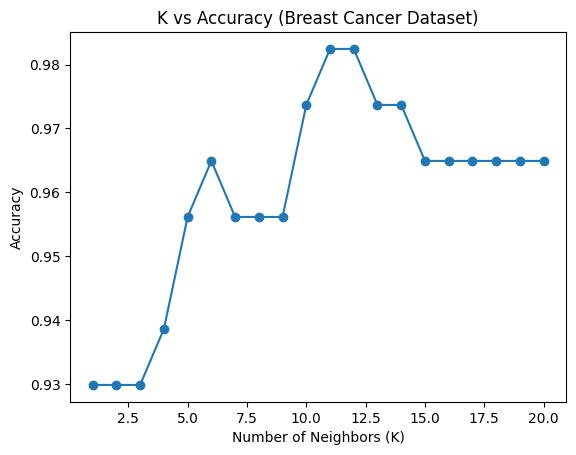

In [5]:
# 🧪 KNN Implementation (Breast Cancer Dataset)

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1️⃣ Load Dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

print("Dataset Shape:", X.shape)
print("Target Classes:", list(cancer.target_names))

# 2️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3️⃣ Train KNN Model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 4️⃣ Predict & Evaluate
y_pred = knn.predict(X_test)

print("\n🔎 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))

print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred), 4))

# 5️⃣ Accuracy vs K Plot
k_values = range(1, 21)
scores = []
for k in k_values:
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    scores.append(knn_temp.score(X_test, y_test))

plt.plot(k_values, scores, marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("K vs Accuracy (Breast Cancer Dataset)")
plt.show()
